# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url, index_col=0)

In [2]:
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [3]:
train_df.shape

(6000, 61)

In [4]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [5]:
y.mean()

0.5

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

treereg = DecisionTreeRegressor(random_state=666)
logreg = LogisticRegression(random_state=666)

In [8]:
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=666, splitter='best')

In [9]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=666, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy")
print("Decision Tree: " + str(accuracy_score(y_test,treereg.predict(X_test))))
print("Logistic Red : " + str(accuracy_score(y_test,logreg.predict(X_test))))

Accuracy
Decision Tree: 0.5606666666666666
Logistic Red : 0.622


In [11]:
from sklearn.metrics import f1_score

print("f1-score")
print("Decision Tree: " + str(f1_score(y_test,treereg.predict(X_test))))
print("Logistic Red : " + str(f1_score(y_test,logreg.predict(X_test))))

f1-score
Decision Tree: 0.5621262458471761
Logistic Red : 0.6026629292221443


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [12]:
import numpy as np
n_estimators = 300
n_est_p = 100
# set a seed for reproducibility
np.random.seed(666)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [13]:
# Define the samples for each set of classifiers.

samples_DT_mn = samples[:100]
samples_DT_m2 = samples[100:200]
samples_Log = samples[200:300]

print("Dimensions check: ")
print(len(samples_DT_mn), len(samples_DT_mn[0]))
print(len(samples_DT_m2), len(samples_DT_m2[0]))
print(len(samples_Log), len(samples_Log[0]))

Dimensions check: 
100 4500
100 4500
100 4500


* **100 Decision Trees (max_depth=None)**

In [14]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(666) 
seeds = np.random.randint(1, 10000, size=n_est_p)

trees_1 = {}
for i in range(n_est_p):
    trees_1[i] = DecisionTreeClassifier(max_depth=None, random_state=seeds[i])
    trees_1[i].fit(X_train.iloc[samples_DT_mn[i]], y_train.iloc[samples_DT_mn[i]])

In [15]:
y_pred_1 = pd.DataFrame(index=X_test.index, columns=list(range(n_est_p)))

for i in range(n_est_p):
    y_pred_1.iloc[:, i] = trees_1[i].predict(X_test)

y_pred_1.sample(5) # cada columna es un arbol

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
4967,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
5665,0,0,1,0,1,0,1,1,1,0,...,0,0,1,1,0,0,1,1,1,0
5390,0,0,1,0,1,1,0,1,1,0,...,1,1,1,1,0,1,0,1,0,0
4332,1,1,0,0,1,1,1,1,1,0,...,0,1,0,1,0,0,1,0,0,1
100,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


* **100 Decision Trees (max_depth=2)**

In [16]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(666) 
seeds = np.random.randint(1, 10000, size=n_est_p)

trees_2 = {}
for i in range(n_est_p):
    trees_2[i] = DecisionTreeClassifier(max_depth=2, random_state=seeds[i])
    trees_2[i].fit(X_train.iloc[samples_DT_m2[i]], y_train.iloc[samples_DT_m2[i]])

In [17]:
y_pred_2 = pd.DataFrame(index=X_test.index, columns=list(range(n_est_p)))

for i in range(n_est_p):
    y_pred_2.iloc[:, i] = trees_2[i].predict(X_test)

y_pred_2.sample(5) # cada columna es un arbol

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
4967,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5665,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,1,1,0
5390,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,1,1,0
4332,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


* **100 Logistic Regressions**

In [18]:
from sklearn.linear_model import LogisticRegression

np.random.seed(666) 
seeds = np.random.randint(1, 10000, size=n_est_p)

log = {}
for i in range(n_est_p):
    log[i] = LogisticRegression(random_state = seeds[i])
    log[i].fit(X_train.iloc[samples_Log[i]], y_train.iloc[samples_Log[i]])

In [19]:
y_pred_3 = pd.DataFrame(index=X_test.index, columns=list(range(n_est_p)))

for i in range(n_est_p):
    y_pred_3.iloc[:, i] = log[i].predict(X_test)

y_pred_3.sample(5) # cada columna es un arbol

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
4967,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5665,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5390,0,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4332,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

* Metrics before Ensemble

In [20]:
Threshold = n_est_p * 0.5

y_pred1 = (y_pred_1.sum(axis=1) >= Threshold).astype(np.int)
y_pred2 = (y_pred_2.sum(axis=1) >= Threshold).astype(np.int)
y_pred3 = (y_pred_3.sum(axis=1) >= Threshold).astype(np.int)

In [21]:
print("Accuracy")
print("Decision Tree (max_depth=None): " + str(accuracy_score(y_test,y_pred1)))
print("Decision Tree (max_depth=2)   : " + str(accuracy_score(y_test,y_pred2)))
print("Logistic                      : " + str(accuracy_score(y_test,y_pred3)))

Accuracy
Decision Tree (max_depth=None): 0.6646666666666666
Decision Tree (max_depth=2)   : 0.6466666666666666
Logistic                      : 0.628


In [22]:
print("F1-Score")
print("Decision Tree (max_depth=None): " + str(f1_score(y_test,y_pred1)))
print("Decision Tree (max_depth=2)   : " + str(f1_score(y_test,y_pred2)))
print("Logistic                      : " + str(f1_score(y_test,y_pred3)))

F1-Score
Decision Tree (max_depth=None): 0.6761107533805537
Decision Tree (max_depth=2)   : 0.6637055837563451
Logistic                      : 0.611961057023644


Result summary

In [23]:
Results = pd.DataFrame()
Results["Index"] = ("Accuracy","F1Score")
Results.set_index(["Index"], inplace=True)

In [24]:
Results["DT_maxdepth_none"] = (accuracy_score(y_test,y_pred1),f1_score(y_test,y_pred1))
Results["DT_maxdepth_2"] = (accuracy_score(y_test,y_pred2),f1_score(y_test,y_pred2))
Results["Logistic"] = (accuracy_score(y_test,y_pred3),f1_score(y_test,y_pred3))
Results

,DT_maxdepth_none,DT_maxdepth_2,Logistic
Index,,,
Accuracy,0.664667,0.646667,0.628000
F1Score,0.676111,0.663706,0.611961


* Ensemble using majority voting

In [25]:
y_pred_ = pd.concat([y_pred_1,y_pred_2,y_pred_3], axis=1)
y_pred_.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
5107,0,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3011,1,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4604,0,0,0,1,0,1,0,0,0,0,...,0,1,1,1,0,1,0,1,1,0
35,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
4374,1,1,1,0,1,1,1,1,0,1,...,1,0,1,1,0,0,1,1,0,0


In [26]:
y_pred_.shape

(1500, 300)

In [27]:
# Using the same threshold for comparisson

Threshold = n_estimators * 0.5

y_pred = (y_pred_.sum(axis=1) >= Threshold).astype(np.int) 
y_pred[:5]

5479    0
5460    0
442     1
1094    1
5430    1
dtype: int32

In [28]:
print("Ensemble using majority voting")
print("\n")

print("Accuracy")
print(accuracy_score(y_test,y_pred))

print("F1 Score")
print(f1_score(y_test,y_pred))

Ensemble using majority voting


Accuracy
0.65
F1 Score
0.6525479814692258


In [29]:
Results["Majority_Voting"] = (accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))
Results

,DT_maxdepth_none,DT_maxdepth_2,Logistic,Majority_Voting
Index,,,,
Accuracy,0.664667,0.646667,0.628000,0.650000
F1Score,0.676111,0.663706,0.611961,0.652548


Using this method, were improved the F1-Score but decreased the Accuracy of the new Ensemble model! 

This because the logistic method impact negatively in the overall score!

# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [30]:
prob_pos = np.round(y_pred.sum() / y_pred_.shape[0], decimals = 4)

print('Using a threshold of 50%, the current probability for the models predict as positive (or just "1") is:')
print(prob_pos)

Using a threshold of 50%, the current probability for the models predict as positive (or just "1") is:
0.4927


In [31]:
prob_pos_ = []

for i in np.arange(0,1,0.001):
    
    y_pred_p = (y_pred_.sum(axis=1) >= (n_estimators * i)).astype(np.int)
    prob_pos_.append(f1_score(y_test,y_pred_p))

C:\Users\amart\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
prob_pos_df = pd.DataFrame(prob_pos_)
prob_pos_df.rename(columns={0 : "F1Score"}, inplace=True)
prob_pos_df['ind'] = np.arange(0,1,0.001)
prob_pos_df.set_index('ind', inplace=True)
prob_pos_df.head(5)

,F1Score
ind,
0.000,0.679577
0.001,0.679577
0.002,0.679577
0.003,0.679577
0.004,0.679577


Let's plot this dataframe!

In [33]:
import matplotlib.pyplot as plt

plt.plot(prob_pos_df)
plt.legend(["Ensemblee"])
plt.ylabel('F1-score')
plt.xlabel('Threshold')
plt.show()

<Figure size 640x480 with 1 Axes>

But, where is the maximum?

In [34]:
prob_pos_df.loc[prob_pos_df.F1Score == prob_pos_df["F1Score"].max()]

,F1Score
ind,
0.121,0.714141
0.122,0.714141
0.123,0.714141


# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [35]:
# Because were used 3 different regression models, will calculate the samples for the oob separetely

samples_oob_1 = []
samples_oob_2 = []
samples_oob_3 = []

for sample in samples_DT_mn:
    samples_oob_1.append(sorted(set(range(n_samples)) - set(sample)))
    
for sample in samples_DT_m2:
    samples_oob_2.append(sorted(set(range(n_samples)) - set(sample)))
    
for sample in samples_Log:
    samples_oob_3.append(sorted(set(range(n_samples)) - set(sample)))

In [36]:
errors_1 = np.zeros(n_est_p)
errors_2 = np.zeros(n_est_p)
errors_3 = np.zeros(n_est_p)

for i in range(n_est_p):
    y_pred_1 = trees_1[i].predict(X_train.iloc[samples_oob_1[i]])
    errors_1[i] = 1 - accuracy_score(y_train.iloc[samples_oob_1[i]], y_pred_1)

for i in range(n_est_p):
    y_pred_2 = trees_2[i].predict(X_train.iloc[samples_oob_2[i]])
    errors_2[i] = 1 - accuracy_score(y_train.iloc[samples_oob_2[i]], y_pred_2)

for i in range(n_est_p):
    y_pred_3 = log[i].predict(X_train.iloc[samples_oob_3[i]])
    errors_3[i] = 1 - accuracy_score(y_train.iloc[samples_oob_3[i]], y_pred_3)

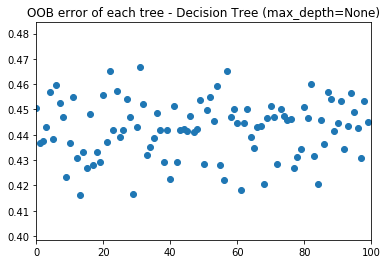

In [37]:
plt.scatter(range(n_est_p), errors_1)
plt.xlim([0, n_est_p])
plt.title('OOB error of each tree - Decision Tree (max_depth=None)')
plt.show()

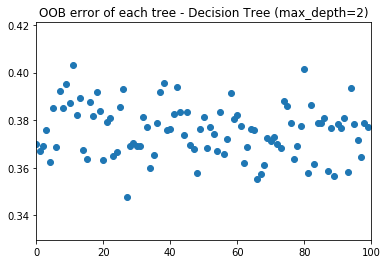

In [38]:
import matplotlib.pyplot as plt
#plt.style.use('')

plt.scatter(range(n_est_p), errors_2)
plt.xlim([0, n_est_p])
plt.title('OOB error of each tree - Decision Tree (max_depth=2)')
plt.show()

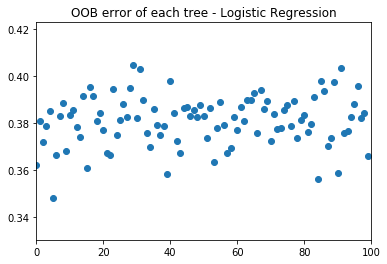

In [39]:
import matplotlib.pyplot as plt
#plt.style.use('')

plt.scatter(range(n_est_p), errors_3)
plt.xlim([0, n_est_p])
plt.title('OOB error of each tree - Logistic Regression')
plt.show()

In [40]:
# Create the full array for the errors calculation

errors_ = np.concatenate((errors_1,errors_2,errors_3))
pd.Series(errors_).head()

0    0.450644
1    0.436671
2    0.437463
3    0.442928
4    0.456745
dtype: float64

In [41]:
# Determinate the alpha applicable

alpha = (1 - errors_) / (1 - errors_).sum()
pd.Series(alpha).head()

0    0.003050
1    0.003127
2    0.003123
3    0.003092
4    0.003016
dtype: float64

In [42]:
# Weight vector creation

weighted_sum = ((y_pred_) * alpha).sum(axis=1)
pd.Series(weighted_sum).head()

5479    0.049709
5460    0.034249
442     0.828726
1094    0.551429
5430    0.874929
dtype: float64

In [45]:
y_pred_w = (weighted_sum >= 0.5).astype(np.int)
pd.Series(y_pred_w).head()

5479    0
5460    0
442     1
1094    1
5430    1
dtype: int32

In [46]:
print("Ensemble using weighted voting using the oob_error")
print("\n")

print("Accuracy")
print(accuracy_score(y_test,y_pred_w))

print("F1 Score")
print(f1_score(y_test,y_pred_w))

Ensemble using weighted voting using the oob_error


Accuracy
0.6526666666666666
F1 Score
0.6538205980066446


In [47]:
Results["Weighted_Voting"] = (accuracy_score(y_test,y_pred_w),f1_score(y_test,y_pred_w))
Results

,DT_maxdepth_none,DT_maxdepth_2,Logistic,Majority_Voting,Weighted_Voting
Index,,,,,
Accuracy,0.664667,0.646667,0.628000,0.650000,0.652667
F1Score,0.676111,0.663706,0.611961,0.652548,0.653821


# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [48]:
prob_pos_w = np.round(y_pred_w.sum() / y_pred_w.shape[0], decimals = 4)

print('Using a threshold of 50%, the current probability for the models predict as positive (or just "1") is:')
print(prob_pos_w)

Using a threshold of 50%, the current probability for the models predict as positive (or just "1") is:
0.4887


Using Majority Voting the probability was "0.4927"... Now, is "0.4887". Decreased!

In [49]:
prob_pos_w_ = []

for i in np.arange(0,1,0.001):
    
    y_pred_p = (weighted_sum >= i).astype(np.int)
    prob_pos_w_.append(f1_score(y_test,y_pred_p))

C:\Users\amart\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
prob_pos_w_df = pd.DataFrame(prob_pos_w_)
prob_pos_w_df.rename(columns={0 : "F1Score"}, inplace=True)
prob_pos_w_df['ind'] = np.arange(0,1,0.001)
prob_pos_w_df.set_index('ind', inplace=True)
prob_pos_w_df.head(5)

,F1Score
ind,
0.000,0.679577
0.001,0.679577
0.002,0.679577
0.003,0.679577
0.004,0.679577


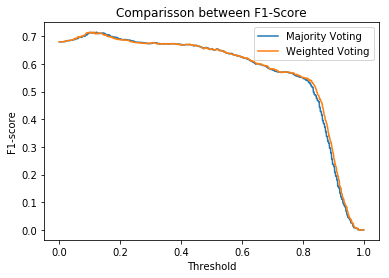

In [51]:
plt.plot(prob_pos_df)
plt.plot(prob_pos_w_df)

plt.title('Comparisson between F1-Score')
plt.ylabel('F1-score')
plt.xlabel('Threshold')

plt.legend(["Majority Voting", "Weighted Voting"])

plt.show()

The curves are similar... Not the same!

Is important to highlight that the maximum is similar between them!

Let's identify it!

In [52]:
prob_pos_w_df.loc[prob_pos_w_df.F1Score == prob_pos_w_df["F1Score"].max()]

,F1Score
ind,
0.113,0.714141
0.114,0.714141


# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [53]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    if i < (n_estimators / 3):
        X_train_2[i] = trees_1[i].predict(X_train)
    elif i < (n_estimators * 2 / 3):
        X_train_2[i] = trees_2[i - (n_estimators / 3)].predict(X_train)
    else:
        X_train_2[i] = log[i - (n_estimators * 2 / 3)].predict(X_train)

X_train_2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
4755,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1434,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1995,1,1,1,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
3131,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5932,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv = 5)
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [55]:
y_pred = lr.predict(y_pred_)

In [57]:
f1_score(y_pred, y_test), accuracy_score(y_pred, y_test)

(0.6618421052631579, 0.6573333333333333)

In [58]:
Results["logistic"] = (accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))
Results

,DT_maxdepth_none,DT_maxdepth_2,Logistic,Majority_Voting,Weighted_Voting,logistic
Index,,,,,,
Accuracy,0.664667,0.646667,0.628000,0.650000,0.652667,0.657333
F1Score,0.676111,0.663706,0.611961,0.652548,0.653821,0.661842
